Github : 

Data : 
https://www.kaggle.com/datasets/mansoordaku/ckdisease/data
https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease


Chronic kidney disease is characterized by the kidney's inability to properly filter waste from the blood. Long term damage to the kidneys can create a toxic waste buildup within the body, leading to other issues such as heart disease, stroke and death. According to the CDC, more than 1 in 7 adults have chronic kidney disease (about 35.5 million people as of 2023). Laboratory testing is the most common way to diagnose chronic kidney disease because patients usually do not feel ill nor do they have symptoms. The investigation of laboratory data and patient history can be used to determine what indicators would increase the chance of a patient developing the disease. The following dataset presents a binary classification problem. 

This data was collected in India over a two month period. It consists of 24 features and one target variable. Each row represents 400 people as well as their diagnostic laboratory results and related health history. The target variable is called "classification', which is defined as having chronic kidney disease (ckd) or not having chronic kidney disease (notckd). 

My goal is to use a logistic regression model to show how well these factors can indicate a risk of the patient developing chronic kidney disease within a sample population. We will also examine what factor associated with abnormal findings in urinalysis and blood testing would most likely help indicate a risk of developing chronic kidney disease in the sample population. I hypothesize that the top factor with the highest correlation to the risk of developing chronic kidney disease is blood pressure.

In [72]:
#import libraries and data 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("kidney_disease.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


Data Cleaning

In this process, I dropped unwanted features, addressed missing values, removed duplicates, corrected inconsistent inputs for data, renamed columns for better understanding, transformed categorical variables into numerical, and used boxplots and histograms to identify outliers to remove them. 

In [75]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [77]:
#drop unwanted features 
df = df.drop(['id', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'], axis = 1) 
#drop high null value columns because : 
#replacing null with 0 creates lab values that would not be compatible with life. 
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [79]:
#address missing values

#replace nulls with zeros
df['al'].fillna ('0.0', inplace = True) 
df['su'].fillna('0.0', inplace = True) 

#replace nulls with unknown
df['rbc'].fillna ('unknown', inplace = True) #replace null with 
df['pc'].fillna('unknown', inplace = True) #replace null with
df['pcc'].fillna ('unknown', inplace = True) #replace null with 
df['ba'].fillna ('unknown', inplace = True) #replace null with 

#replace nulls with unk (abbreviated unknown)
df['htn'].fillna ('unk', inplace = True) #replace null with unknown
df['dm'].fillna('unk', inplace = True) #replace null with unknown
df['cad'].fillna ('unk', inplace = True) #replace null with zeros
df['appet'].fillna ('unk', inplace = True) #replace null with not reported
df['pe'].fillna('unk', inplace = True) #replace null with unknown
df['ane'].fillna ('unk', inplace = True) #replace null with zeros

df.isnull().sum()

age                9
bp                12
sg                47
al                 0
su                 0
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [81]:
#drop remaining null values 
df = df.dropna().copy()
#recheck null 
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [83]:
#check for inconsistencies in categorical variables
for col in df:
    print(df[col].unique())


[48. 62. 51. 60. 68. 52. 53. 50. 63. 40. 47. 61. 75. 69. 73. 70. 65. 76.
 82. 46. 35. 54. 67. 15. 26. 56. 74. 59. 58. 71. 34. 17. 55. 45. 72. 41.
  8. 39. 66. 83. 21. 42. 30. 64.  6. 49. 90. 33. 57. 80. 23. 38. 25. 19.
 24. 20. 44. 29. 43. 28. 32. 37. 22. 79. 36. 12.]
[ 80.  70.  90. 100.  60. 110.  50. 120.]
[1.02  1.01  1.005 1.015 1.025]
[1.0 2.0 4.0 3.0 0.0 '0.0']
[0.0 3.0 4.0 1.0 2.0 5.0 '0.0']
['unknown' 'normal' 'abnormal']
['normal' 'abnormal' 'unknown']
['notpresent' 'present' 'unknown']
['notpresent' 'present' 'unknown']
[121. 423. 117. 106.  74. 100. 138.  70. 490. 380. 208. 157.  76.  99.
 263. 173.  95. 108. 156. 264. 107. 159. 140. 171. 270.  92. 204.  79.
 207. 124. 144. 162. 246. 253. 141. 182.  86. 150. 112. 250. 360. 163.
 129. 133. 102. 165. 132. 127. 169. 251. 109. 280. 210. 219. 295.  93.
  94. 172.  91. 153.  88. 226. 115. 297. 123. 294. 323.  90. 118. 224.
 158. 128. 214. 213. 268. 256. 105. 288. 139.  78. 273. 242. 122. 424.
 303. 160. 307. 447. 309.  22. 261. 2

In [85]:
#replace mistyped values & recheck! 

df = df.replace(to_replace = ['\tyes', ' yes'], value = 'yes')
df = df.replace(to_replace = ['\tno'], value = 'no')
df = df.replace(to_replace = ['ckd\t'], value = 'ckd')

for col in df:
    print(df[col].unique())

[48. 62. 51. 60. 68. 52. 53. 50. 63. 40. 47. 61. 75. 69. 73. 70. 65. 76.
 82. 46. 35. 54. 67. 15. 26. 56. 74. 59. 58. 71. 34. 17. 55. 45. 72. 41.
  8. 39. 66. 83. 21. 42. 30. 64.  6. 49. 90. 33. 57. 80. 23. 38. 25. 19.
 24. 20. 44. 29. 43. 28. 32. 37. 22. 79. 36. 12.]
[ 80.  70.  90. 100.  60. 110.  50. 120.]
[1.02  1.01  1.005 1.015 1.025]
[1.0 2.0 4.0 3.0 0.0 '0.0']
[0.0 3.0 4.0 1.0 2.0 5.0 '0.0']
['unknown' 'normal' 'abnormal']
['normal' 'abnormal' 'unknown']
['notpresent' 'present' 'unknown']
['notpresent' 'present' 'unknown']
[121. 423. 117. 106.  74. 100. 138.  70. 490. 380. 208. 157.  76.  99.
 263. 173.  95. 108. 156. 264. 107. 159. 140. 171. 270.  92. 204.  79.
 207. 124. 144. 162. 246. 253. 141. 182.  86. 150. 112. 250. 360. 163.
 129. 133. 102. 165. 132. 127. 169. 251. 109. 280. 210. 219. 295.  93.
  94. 172.  91. 153.  88. 226. 115. 297. 123. 294. 323.  90. 118. 224.
 158. 128. 214. 213. 268. 256. 105. 288. 139.  78. 273. 242. 122. 424.
 303. 160. 307. 447. 309.  22. 261. 2

In [87]:
#rename columns for better understanding of the data

features = [
    'age', 'blood_pressure',
    'specific_gravity', 'urine_albumin', 'urine_glucose', 'urine_rbc', 'urine_wbc', 'urine_wbcc', 'urine_bacteria',
    'blood_glucose', 'blood_urea', 'blood_creatinine', 'hypertension', 'diabetes_mellitus', 'coronary_artery_dx', 
    'appetite', 'edema', 'anemia', 'chronic_kidney_dx'
]
df.columns = features

#rename target & label ckd and notckd values to 0 and 1
df = df.rename(columns={'chronic_kidney_dx': 'target'})
df['target'].value_counts(dropna=False)

print (df.head(5))

    age  blood_pressure  specific_gravity urine_albumin urine_glucose  \
0  48.0            80.0             1.020           1.0           0.0   
2  62.0            80.0             1.010           2.0           3.0   
3  48.0            70.0             1.005           4.0           0.0   
4  51.0            80.0             1.010           2.0           0.0   
5  60.0            90.0             1.015           3.0           0.0   

  urine_rbc urine_wbc  urine_wbcc urine_bacteria  blood_glucose  blood_urea  \
0   unknown    normal  notpresent     notpresent          121.0        36.0   
2    normal    normal  notpresent     notpresent          423.0        53.0   
3    normal  abnormal     present     notpresent          117.0        56.0   
4    normal    normal  notpresent     notpresent          106.0        26.0   
5   unknown   unknown  notpresent     notpresent           74.0        25.0   

   blood_creatinine hypertension diabetes_mellitus coronary_artery_dx  \
0            

In [89]:
#convert categorical variables into numeric

df.loc[df['urine_rbc'] == 'normal', 'urine_rbc'] = 0
df.loc[df['urine_rbc'] == 'abnormal', 'urine_rbc'] = 1
df.loc[df['urine_rbc'] == 'unknown', 'urine_rbc'] = 2

df.loc[df['urine_wbc'] == 'normal', 'urine_wbc'] = 0
df.loc[df['urine_wbc'] == 'abnormal', 'urine_wbc'] = 1
df.loc[df['urine_wbc'] == 'unknown', 'urine_wbc'] = 2

df.loc[df['urine_wbcc'] == 'notpresent', 'urine_wbcc'] = 0
df.loc[df['urine_wbcc'] == 'present', 'urine_wbcc'] = 1
df.loc[df['urine_wbcc'] == 'unknown', 'urine_wbcc'] = 2

df.loc[df['urine_bacteria'] == 'notpresent', 'urine_bacteria'] = 0
df.loc[df['urine_bacteria'] == 'present', 'urine_bacteria'] = 1
df.loc[df['urine_bacteria'] == 'unknown', 'urine_bacteria'] = 2

df.loc[df['hypertension'] == 'no', 'hypertension'] = 0
df.loc[df['hypertension'] == 'yes', 'hypertension'] = 1
df.loc[df['hypertension'] == 'unk', 'hypertension'] = 2

df.loc[df['diabetes_mellitus'] == 'no', 'diabetes_mellitus'] = 0
df.loc[df['diabetes_mellitus'] == 'yes', 'diabetes_mellitus'] = 1
df.loc[df['diabetes_mellitus'] == 'unk', 'diabetes_mellitus'] = 2

df.loc[df['coronary_artery_dx'] == 'no', 'coronary_artery_dx'] = 0
df.loc[df['coronary_artery_dx'] == 'yes', 'coronary_artery_dx'] = 1
df.loc[df['coronary_artery_dx'] == 'unk', 'coronary_artery_dx'] = 2

df.loc[df['edema'] == 'no', 'edema'] = 0
df.loc[df['edema'] == 'yes', 'edema'] = 1
df.loc[df['edema'] == 'unk', 'edema'] = 2

df.loc[df['anemia'] == 'no', 'anemia'] = 0
df.loc[df['anemia'] == 'yes', 'anemia'] = 1
df.loc[df['anemia'] == 'unk', 'anemia'] = 2

df.loc[df['appetite'] == 'good', 'appetite'] = 0
df.loc[df['appetite'] == 'poor', 'appetite'] = 1
df.loc[df['appetite'] == 'unk', 'appetite'] = 2

df.loc[df['target'] == 'ckd', 'target'] = 0
df.loc[df['target'] == 'notckd', 'target'] = 1
          
df.dtypes

age                   float64
blood_pressure        float64
specific_gravity      float64
urine_albumin          object
urine_glucose          object
urine_rbc              object
urine_wbc              object
urine_wbcc             object
urine_bacteria         object
blood_glucose         float64
blood_urea            float64
blood_creatinine      float64
hypertension           object
diabetes_mellitus      object
coronary_artery_dx     object
appetite               object
edema                  object
anemia                 object
target                 object
dtype: object

In [91]:
#convert object columns to numerical
df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 399
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 296 non-null    float64
 1   blood_pressure      296 non-null    float64
 2   specific_gravity    296 non-null    float64
 3   urine_albumin       296 non-null    float64
 4   urine_glucose       296 non-null    float64
 5   urine_rbc           296 non-null    int64  
 6   urine_wbc           296 non-null    int64  
 7   urine_wbcc          296 non-null    int64  
 8   urine_bacteria      296 non-null    int64  
 9   blood_glucose       296 non-null    float64
 10  blood_urea          296 non-null    float64
 11  blood_creatinine    296 non-null    float64
 12  hypertension        296 non-null    int64  
 13  diabetes_mellitus   296 non-null    int64  
 14  coronary_artery_dx  296 non-null    int64  
 15  appetite            296 non-null    int64  
 16  edema   

In [93]:
#describe data   
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

factors = ['age', 'blood_pressure', 'specific_gravity', 'urine_albumin', 
           'urine_glucose', 'urine_rbc', 'urine_wbc', 'urine_wbcc', 
           'urine_bacteria','blood_glucose', 'blood_urea', 'blood_creatinine', 
           'hypertension', 'diabetes_mellitus', 'coronary_artery_dx', 'appetite', 
           'edema', 'anemia']
    
df.describe()

#outliers (boxplot) - urine_alb, urine_glu, urine_wbcc, urine_bac, hypertension, coronary_artery_dx, anemia 

,age,blood_pressure,specific_gravity,urine_albumin,urine_glucose,urine_rbc,urine_wbc,urine_wbcc,urine_bacteria,blood_glucose,blood_urea,blood_creatinine,hypertension,diabetes_mellitus,coronary_artery_dx,appetite,edema,anemia,target
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,52.199324,75.979730,1.017872,0.939189,0.435811,0.672297,0.283784,0.145270,0.081081,146.125000,53.973311,2.527027,0.347973,0.324324,0.087838,0.199324,0.165541,0.121622,0.459459
std,15.606956,12.145429,0.005678,1.318583,1.084217,0.881472,0.540440,0.380692,0.308380,77.121308,47.527163,3.636493,0.491138,0.483157,0.306518,0.408552,0.381294,0.337597,0.499198
min,6.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.750000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,26.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,40.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.025000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,159.250000,55.250000,2.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,120.000000,1.025000,4.000000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,391.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


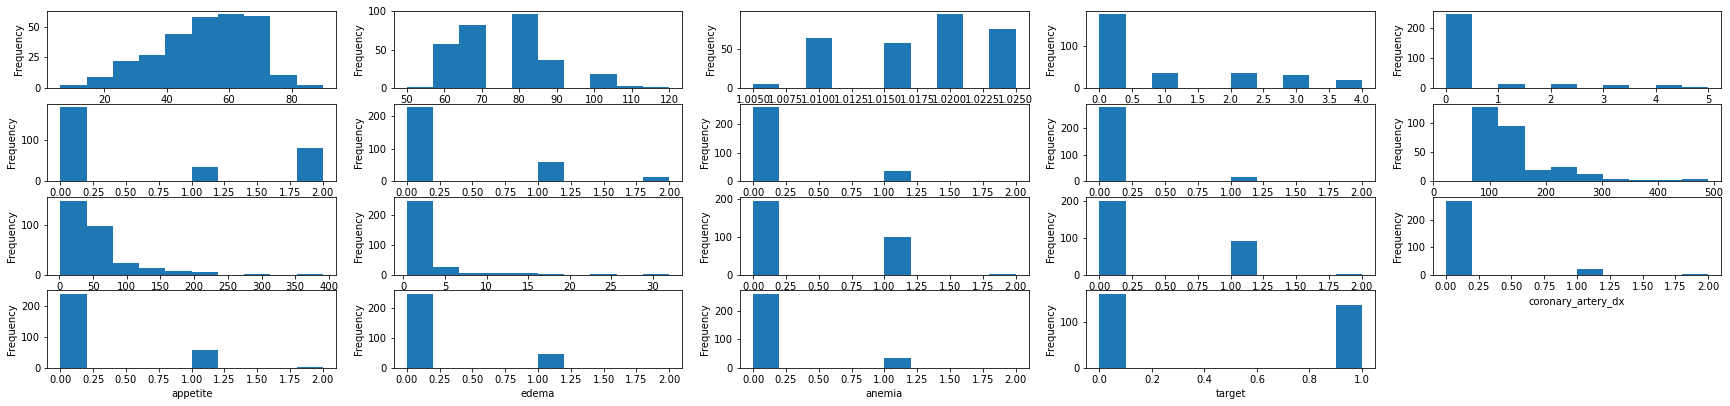

In [95]:
#histogram - all features
fig = plt.figure(figsize=(30, 10))
i=0
for column in df:
    sub=fig.add_subplot(6, 5, i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

Histogram Observation

A few graphs are skewed slightly to the right like age and specific gravity.
Several graphs are skewed to the left like blood_glucose, blood_urea, and blood_creatining
Some graphs show no curve like urine_wbc, urine_Wbcc, and urine_bacteria 

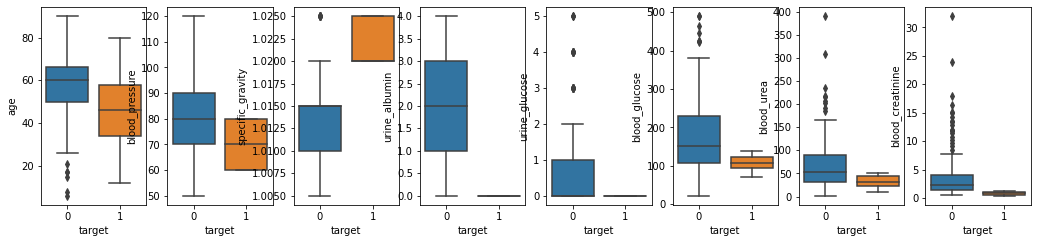

In [98]:
#boxplot - numerical features vs target 
num_factors = ['age', 'blood_pressure', 'specific_gravity', 'urine_albumin', 
               'urine_glucose', 'blood_glucose', 'blood_urea', 'blood_creatinine']

size = pl.figure(figsize=(20, 8))

for i in range (len(num_factors)):
    column = num_factors[i]
    sub=size.add_subplot(2, 9, i+1)
    sns.boxplot(x='target', y=column, data=df)

#some numerical features are showing outliers.

In [100]:
#remove outliers - box plot shows outliers in specific_gravity and urine_glucose
df = df.drop(['specific_gravity', 'urine_glucose'], axis = 1) 

Feature Engineering 
- anova
- chi-squared test, reduce dimension
- variables with zero to little variance?
- features irrelevant to target variable?
- high correlated features? 

Feature Scaling 


graphs - distributions of features, relationships 
correlation - 

In [103]:
#ANOVA for numerical features
from sklearn.feature_selection import SelectKBest, f_classif, chi2

x = df.loc[:, ['age', 'blood_pressure','urine_albumin', 'blood_glucose', 'blood_urea', 'blood_creatinine']]
y = df.loc[:, 'target']

#anova - x, y - shows variation in values and matches box plots 

from sklearn.feature_selection import SelectKBest, f_classif, chi2

np.set_printoptions(suppress = True)
fs = SelectKBest(score_func=f_classif, k='all')
bestFeatures = fs.fit(x, y)
print(bestFeatures.scores_)
print(bestFeatures.pvalues_)

#the larger f-scores are better. Features 3 is most relevant to the target. 
#All p-values are less than 0.05, so all five variables have a significant difference when comparing CKD vs NOTCKD groups

[ 38.28161715  37.73666068 224.23761213  78.97290685  60.29762917
  63.34855981]
[0. 0. 0. 0. 0. 0.]


In [105]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               296 non-null    float64
 1   blood_pressure    296 non-null    float64
 2   urine_albumin     296 non-null    float64
 3   blood_glucose     296 non-null    float64
 4   blood_urea        296 non-null    float64
 5   blood_creatinine  296 non-null    float64
dtypes: float64(6)
memory usage: 16.2 KB


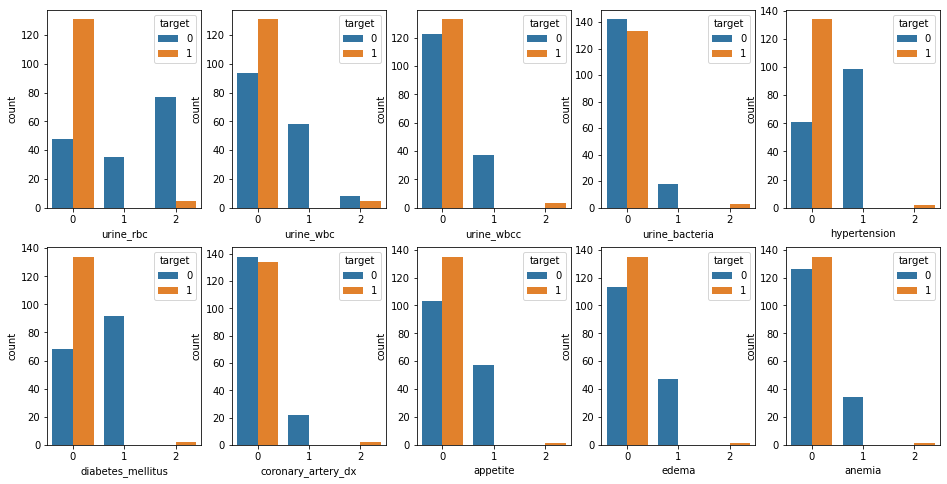

In [107]:
#categorical features vs target 

#0 = normal, not present or no
#1 = abnormal, present, or yes
#2 = unknown
cat_features = ['urine_rbc', 'urine_wbc', 'urine_wbcc', 
           'urine_bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_dx', 'appetite', 
           'edema', 'anemia']
fig=plt.figure(figsize=(16,8))
for i in range(len(cat_features)):
    column=cat_features[i]
    sub=fig.add_subplot(2,5,i+1)
    chart=sns.countplot(x=column, hue='target', data=df)
    
#bar graphs for each of these features are repeating as possible indicators for risk of ckd 

In [109]:
#chi-square 

x = df.loc[:, ['urine_rbc', 'urine_wbc', 'urine_wbcc', 
           'urine_bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_dx', 'appetite', 
           'edema', 'anemia']]
           
y = df.loc[:, 'target']

chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y)
print(catFeatures.scores_)
print(catFeatures.pvalues_)

#The p-values are all smaller than 0.05, so there is a significant difference between those that
#have CKD vs those that do not. 

[134.17335205  39.19341737  17.72099863   4.23970588  73.37547116
  67.47107843   9.77782805  43.02298106  34.57869148  23.64738562]
[0.         0.         0.00002558 0.03948901 0.         0.
 0.00176629 0.         0.         0.00000116]


In [111]:
df.head(5)

,age,blood_pressure,urine_albumin,urine_rbc,urine_wbc,urine_wbcc,urine_bacteria,blood_glucose,blood_urea,blood_creatinine,hypertension,diabetes_mellitus,coronary_artery_dx,appetite,edema,anemia,target
0,48.0,80.0,1.0,2,0,0,0,121.0,36.0,1.2,1,1,0,0,0,0,0
2,62.0,80.0,2.0,0,0,0,0,423.0,53.0,1.8,0,1,0,1,0,1,0
3,48.0,70.0,4.0,0,1,1,0,117.0,56.0,3.8,1,0,0,1,1,1,0
4,51.0,80.0,2.0,0,0,0,0,106.0,26.0,1.4,0,0,0,0,0,0,0
5,60.0,90.0,3.0,2,2,0,0,74.0,25.0,1.1,1,1,0,0,1,0,0


In [113]:
#dummy variables 

df_withdummies = pd.get_dummies(df, columns=['urine_rbc', 'urine_wbc', 'urine_wbcc', 
           'urine_bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_dx', 'appetite', 
           'edema', 'anemia'], drop_first=True)
df_withdummies.head()

,age,blood_pressure,urine_albumin,blood_glucose,blood_urea,blood_creatinine,target,urine_rbc_1,urine_rbc_2,urine_wbc_1,...,diabetes_mellitus_1,diabetes_mellitus_2,coronary_artery_dx_1,coronary_artery_dx_2,appetite_1,appetite_2,edema_1,edema_2,anemia_1,anemia_2
0,48.0,80.0,1.0,121.0,36.0,1.2,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,62.0,80.0,2.0,423.0,53.0,1.8,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,48.0,70.0,4.0,117.0,56.0,3.8,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
4,51.0,80.0,2.0,106.0,26.0,1.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,60.0,90.0,3.0,74.0,25.0,1.1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [115]:
df.corr()["target"].sort_values(ascending=True)

#All of the variables show an inverse relationship due to having a negative correlation.
#The higher the risk of ckd, the decreased cahnce for the presence of urine_albumin, urine_rbc, and hypertension.

urine_albumin        -0.657794
urine_rbc            -0.627328
hypertension         -0.599010
diabetes_mellitus    -0.563702
blood_glucose        -0.460151
blood_creatinine     -0.421039
appetite             -0.417323
blood_urea           -0.412540
edema                -0.365331
urine_wbc            -0.359287
age                  -0.339424
blood_pressure       -0.337276
anemia               -0.292474
urine_wbcc           -0.245385
coronary_artery_dx   -0.176033
urine_bacteria       -0.110695
target                1.000000
Name: target, dtype: float64

Prediction Model

In [118]:
#split the training set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

x = df_withdummies.loc[:, df_withdummies.columns!='target']
y = df_withdummies['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)
print(x.head(5))
print(x_train.head(5))

    age  blood_pressure  urine_albumin  blood_glucose  blood_urea  \
0  48.0            80.0            1.0          121.0        36.0   
2  62.0            80.0            2.0          423.0        53.0   
3  48.0            70.0            4.0          117.0        56.0   
4  51.0            80.0            2.0          106.0        26.0   
5  60.0            90.0            3.0           74.0        25.0   

   blood_creatinine  urine_rbc_1  urine_rbc_2  urine_wbc_1  urine_wbc_2  ...  \
0               1.2            0            1            0            0  ...   
2               1.8            0            0            0            0  ...   
3               3.8            0            0            1            0  ...   
4               1.4            0            0            0            0  ...   
5               1.1            0            1            0            1  ...   

   diabetes_mellitus_1  diabetes_mellitus_2  coronary_artery_dx_1  \
0                    1             

In [120]:
#balance the training set, but keep original data for testing 

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(x_train.shape)
print(oversampled_x.shape)

(207, 26)
(224, 26)


Prediction Model
 - i used accuracy score and confusion matrix to evaluate the prediction model.

In [123]:
LogRegression = LogisticRegression(penalty='none', max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())



LogisticRegression(max_iter=2000, penalty='none')

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


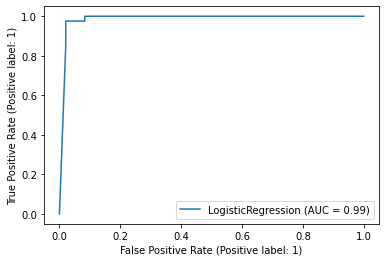

In [125]:
#ROC curve
from sklearn import metrics
metrics.plot_roc_curve(LogRegression, x_test, y_test)

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


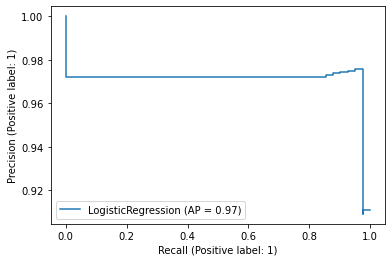

In [127]:
#precision-recall curve
plot_precision_recall_curve(LogRegression, x_test, y_test)

In [129]:
# predict the test data
test_pred = LogRegression.predict(x_test)
print ('accuracy score:', accuracy_score(y_test, test_pred))

accuracy score: 0.9662921348314607


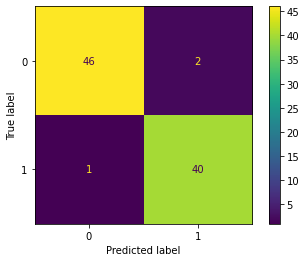

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

#predicting a patient having CKD vs not having CKD

#46 samples were classified correctly as having chronic kidney disease. 
#2 samples were classified incorrectly as having chronic kidney disease.
#40 samples were classified correctly as not having chronic kidney disease.
#1 sample was classified incorrectly as not having chronic kidney disease.

In [133]:
# Interpret the Results
print(LogRegression.intercept_)

[48.07765968]


In [135]:
pd.DataFrame(data={'variable': x_train.columns, 'coefficient': LogRegression.coef_[0]})

,variable,coefficient
0,age,1.393834
1,blood_pressure,-0.277721
2,urine_albumin,-91.265526
3,blood_glucose,0.278426
4,blood_urea,-0.989943
5,blood_creatinine,-20.714588
6,urine_rbc_1,-12.184500
7,urine_rbc_2,-116.236013
8,urine_wbc_1,-20.631078
9,urine_wbc_2,43.128305


Prediction

This logistic regression model shows a 96.6% accuracy score and indicates that a combination of these factors could all contribute to the risk of the patient developing chronic kidney disease. The features with the highest correlation to the risk of developing chronic kidney disease were blood_urea

The one way to improve this model is to drop features that have a high number of unknown values to have a better accuracy. My data set was already limited in size by having a maximum of 400 rows. Many features within the data set contained missing values, which resulted in me excluding over 200 rows from the data set during data cleaning. If more information was collected for these patients, it may have given more data to help the accuracy of the prediction model. There could have also been more patients surveyed in the 2 motnh period, resulting in a larger data set for accurate analysis.  

References

CDC : https://www.cdc.gov/kidneydisease/basics.html